In [3]:
#import all the necessary libraries and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
#for train test spliting 
from sklearn.preprocessing import LabelEncoder 
#for decision tree object
from sklearn.model_selection import train_test_split
#for checking testing results
from sklearn.tree import DecisionTreeClassifier
#for visualizing tree 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree


Now load the dataset. IRIS dataset is available in the seaborn library as well. you can import it with the following command

In [8]:
#reading the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here we have 4 feature columns sepal_length, sepal_width, petal_length, and petal_width respectively with one target column species.

 EDA
 Now performing some basic operations on it.

In [9]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
#checking dimension
df.shape

(150, 5)

we understand that this dataset has 150 records, 5 columns with the first four of type float and last of type object str 

In [13]:
#Checking mising value
df.isnull().any()  #we can also use sum() function

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Now we perform some basic EDA on this dataset. Let’s check the correlation of all the features with each other

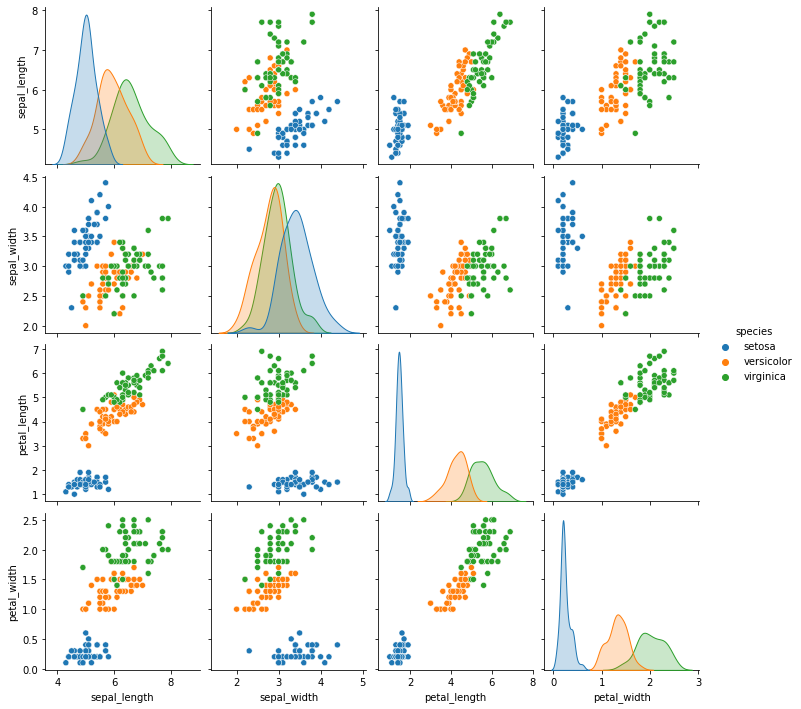

In [14]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue='species')

We have a total of 3 species that we want to predict: setosa, versicolor, and virginica. We can see that setosa always forms a different cluster from the other two.

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


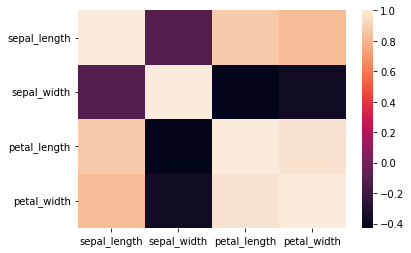

In [16]:
# correlation matrix
sns.heatmap(df.corr())
cor=df.corr()
cor

We can observe from the above two plots:

        1. Setosa always forms a different cluster.
        2. Petal length is highly related to petal width.
        3. Sepal length is not related to sepal width.

Data Preprocessing

In [84]:
#Now, we will separate the target variable(y) and features(X) as follows
target = df['species']
df1 = df.copy()
df2 = df.drop('species', axis = 1)

It is good practice not to drop or add a new column to the original dataset. Make a copy of it and then modify it so in case things don’t work out as we expected, we have the original data to start again with a different approach.

Just for the sake of following mostly used convention, we are storing df in X

Now let’s look at our target variable

In [88]:
#defining the attributies
X = df2
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

target has categorical variables stored in it we will encode it in numeric values for working.

In [89]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We get its encoding as above, setosa:0, versicolor:1, virginica:2

Again for the sake of following the standard naming convention, naming target as y

In [90]:
y = target

Splitting the dataset into training and testing sets. selecting 20% records randomly for testing

In [91]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=42)
print("Training split input -",X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input - (120, 4)
Testing split input-  (30, 4)


After splitting the dataset we have 120 records(rows) for training and 30 records for testing purposes.

Modeling Tree and testing it

In [93]:
# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
dtree = DecisionTreeClassifier().fit(X_train,y_train)
print("Decision Tre Classifier created")


Decision Tre Classifier created


In the above code, we created an object of the class DecisionTreeClassifier , store its address in the variable dtree, so we can access the object using dtree. Then we fit this tree with our X_train and y_train . Finally, we print the statement Decision Tree Classifier Created after the decision tree is built.

In [94]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We got an accuracy of 100% on the testing dataset of 30 records.

let’s plot the confusion matrix as follows

Text(0.5, 1.0, 'Accuracy Score: 1.0')

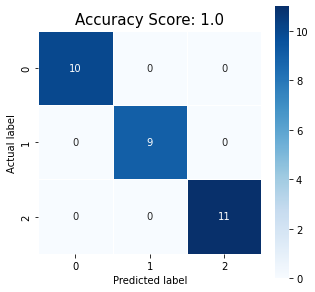

In [98]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

Visualizing the decision tree
We can directly plot the tree that we build using the following commands

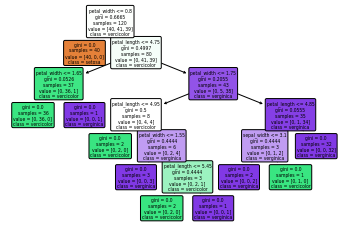

In [99]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [66]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=1, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [67]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [68]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [49]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: name 'y_pred' is not defined